In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1402,2020-08-24,United Kingdom,325750.0,325642.0,41462.0,41429.0,108.0,33.0
1403,2020-08-24,Germany,235847.0,233575.0,9287.0,9272.0,2272.0,15.0
1404,2020-08-24,Iran,360901.0,358905.0,20764.0,20643.0,1996.0,121.0
1405,2020-08-24,Turkey,258077.0,258249.0,6121.0,6121.0,-172.0,0.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  6635.363184079602
RMSE =  26017.8068263098


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  295.70220326936743
RMSE =  723.7568461033374


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  44890.40298507463
RMSE =  81256.71238009138
-- World performances for deaths --
MAE =  1617.402985074627
RMSE =  1987.5868515708473


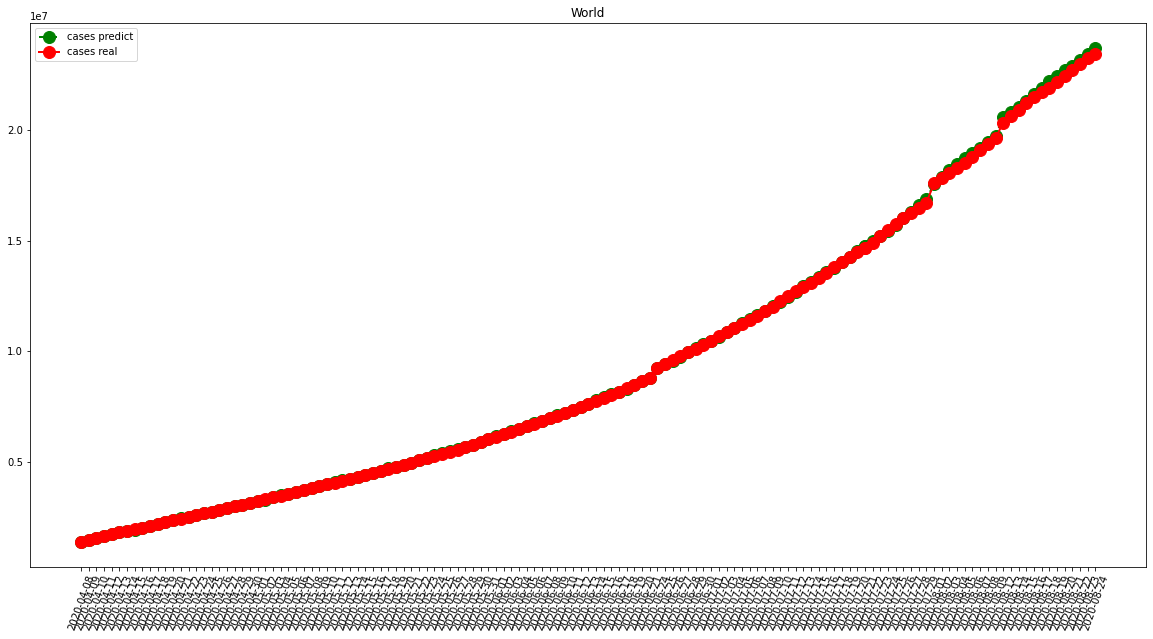

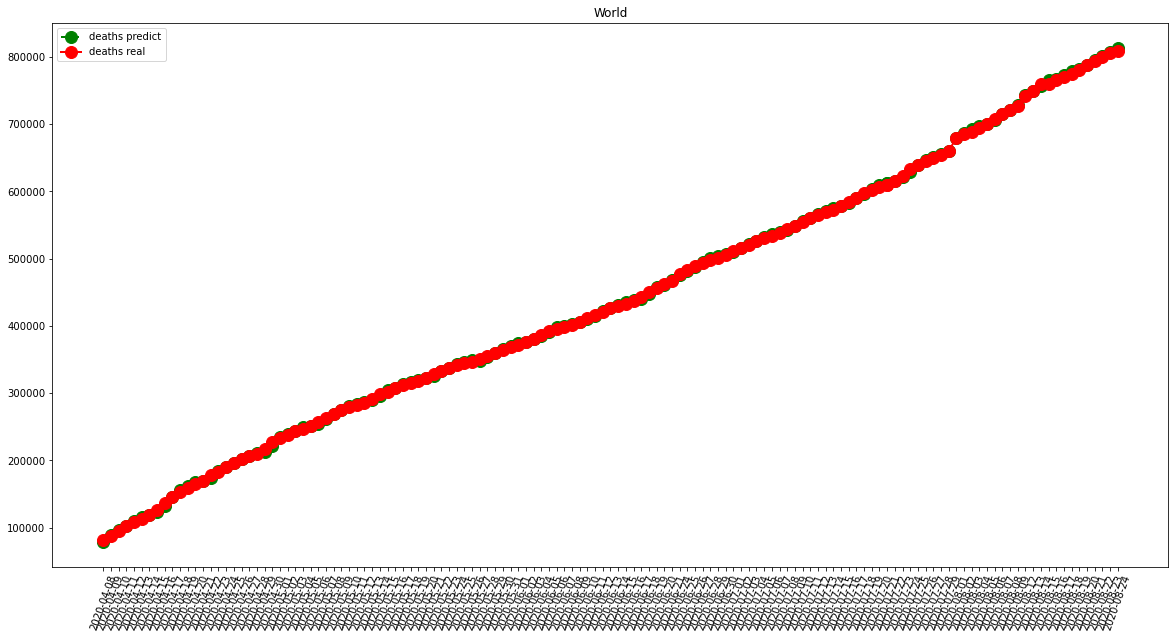

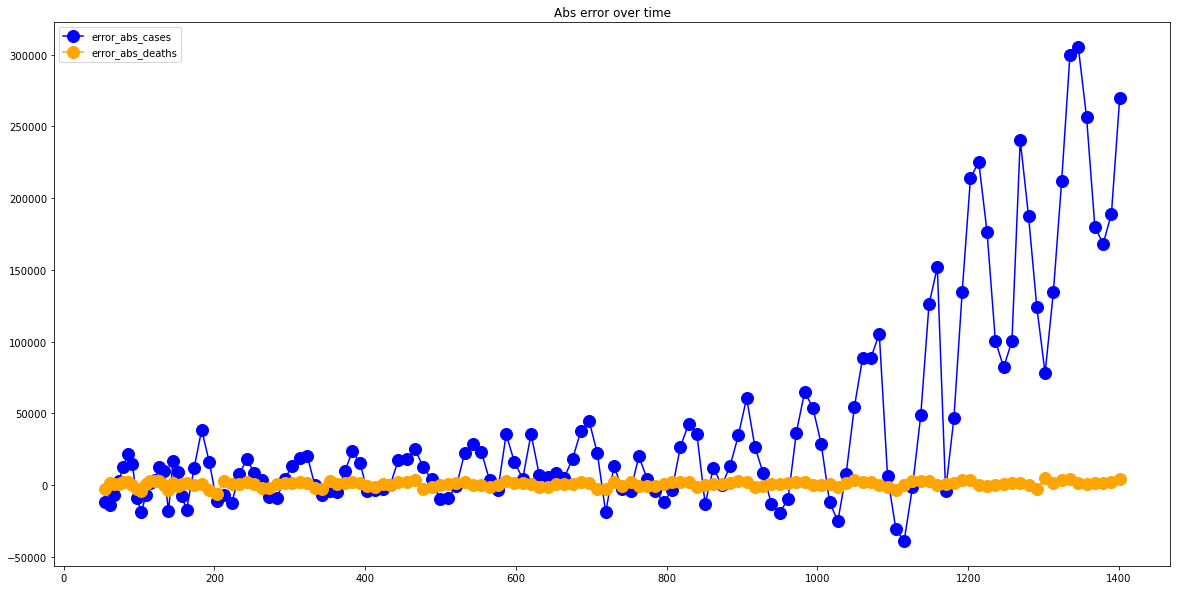

In [7]:
visShow("World")

-- France performances for cases --
MAE =  923.625
RMSE =  1402.9482943667833
-- France performances for deaths --
MAE =  128.65972222222223
RMSE =  279.4595354330291


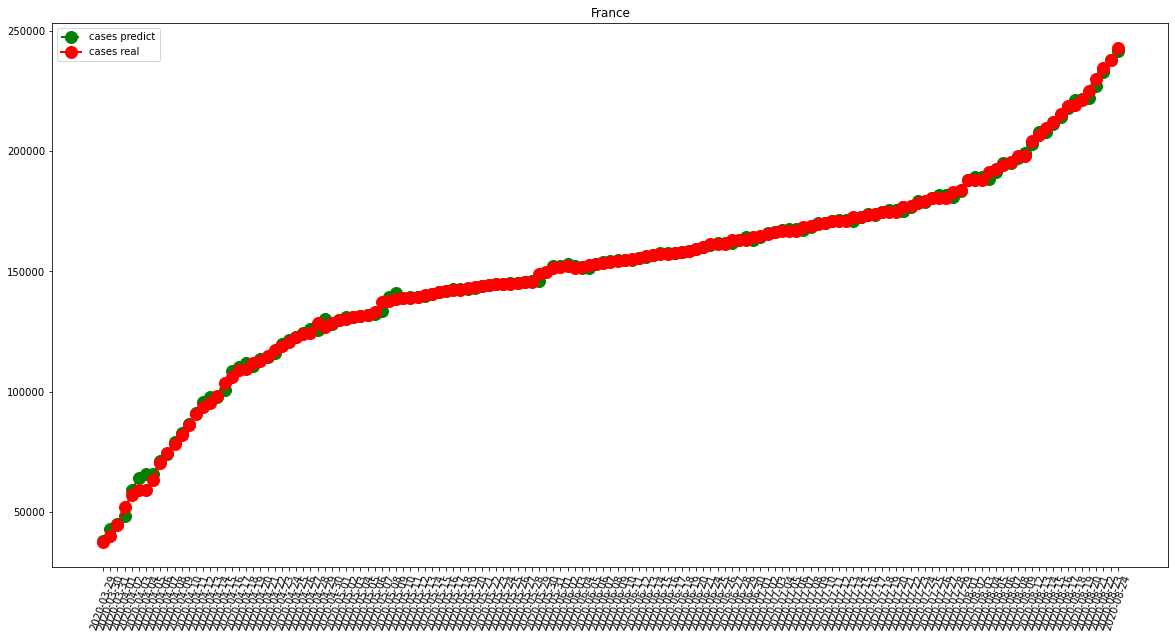

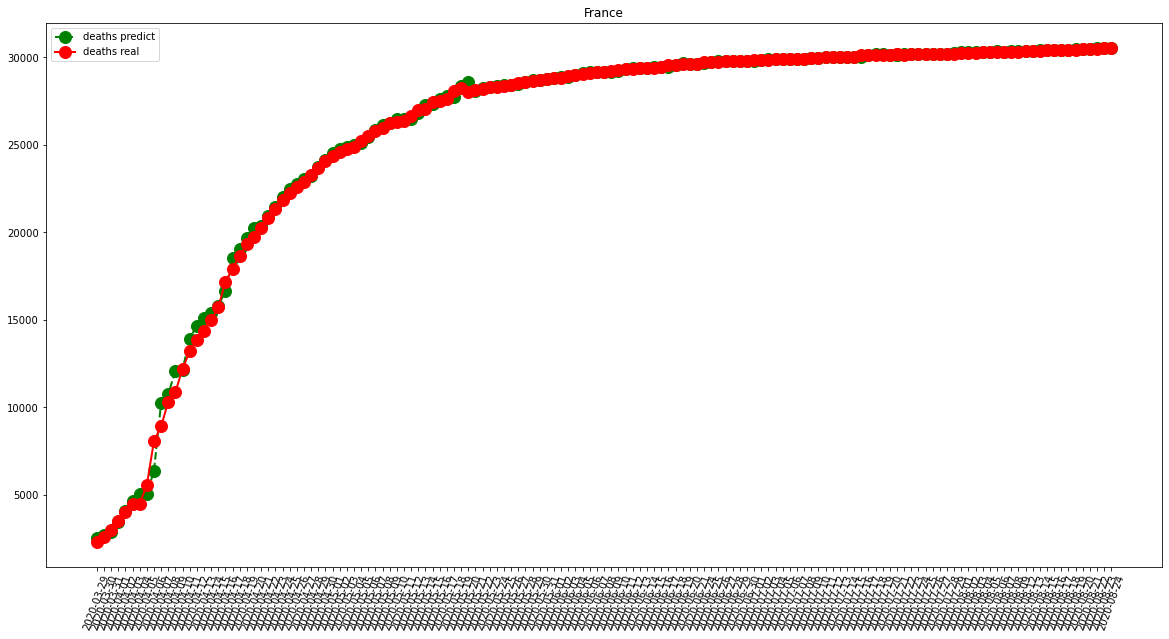

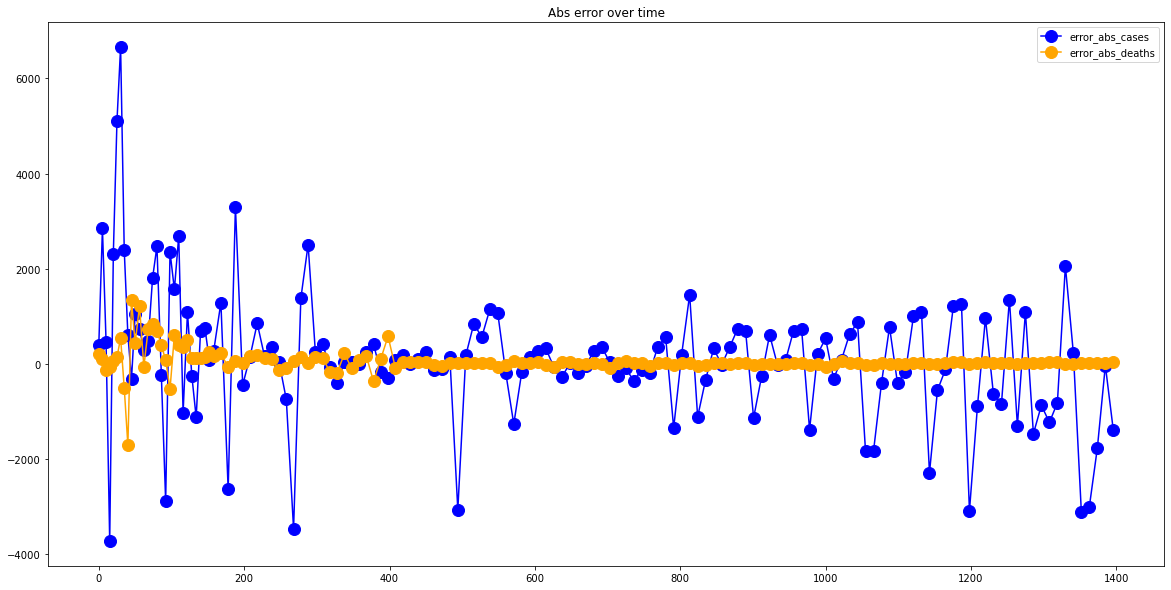

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  304.11805555555554
RMSE =  462.00078914074015
-- Italy performances for deaths --
MAE =  76.19444444444444
RMSE =  247.32364648595797


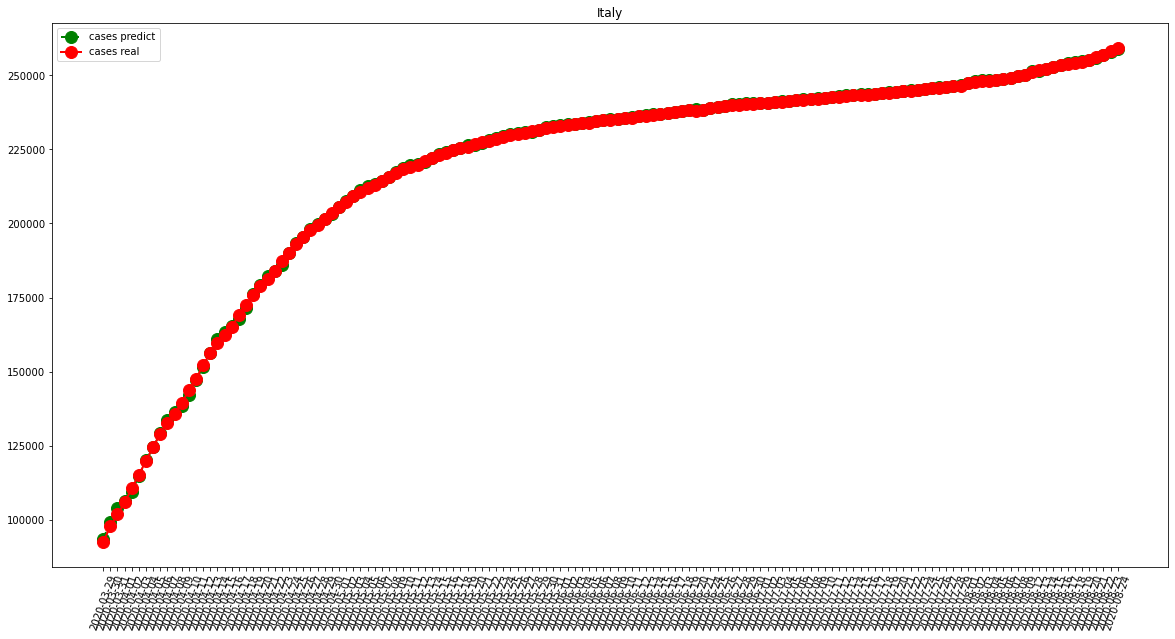

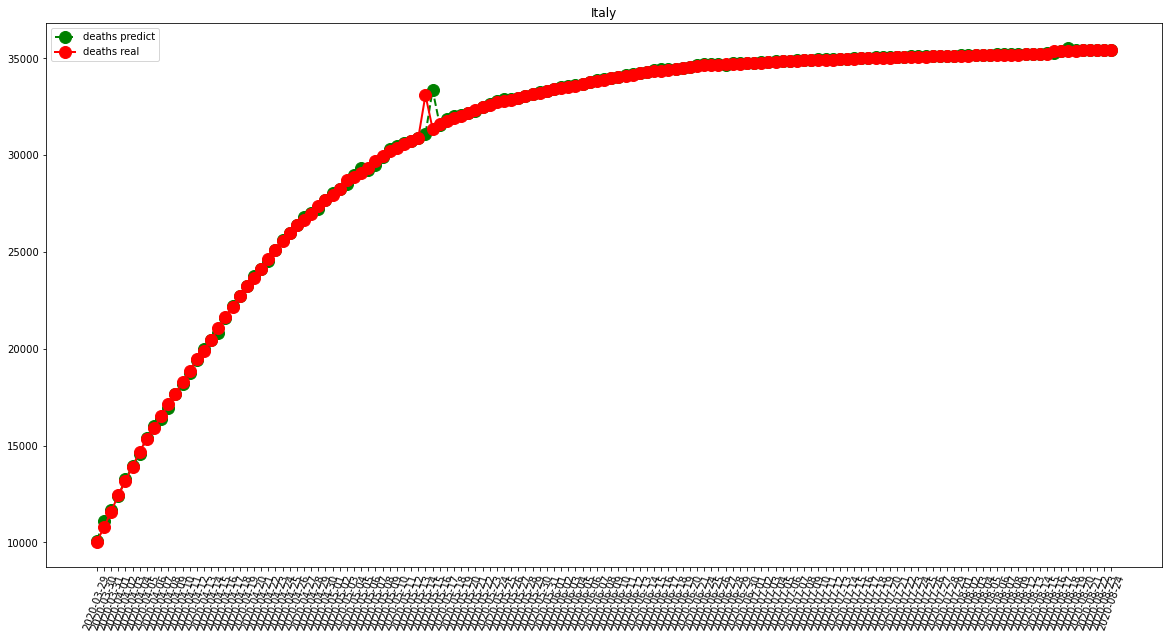

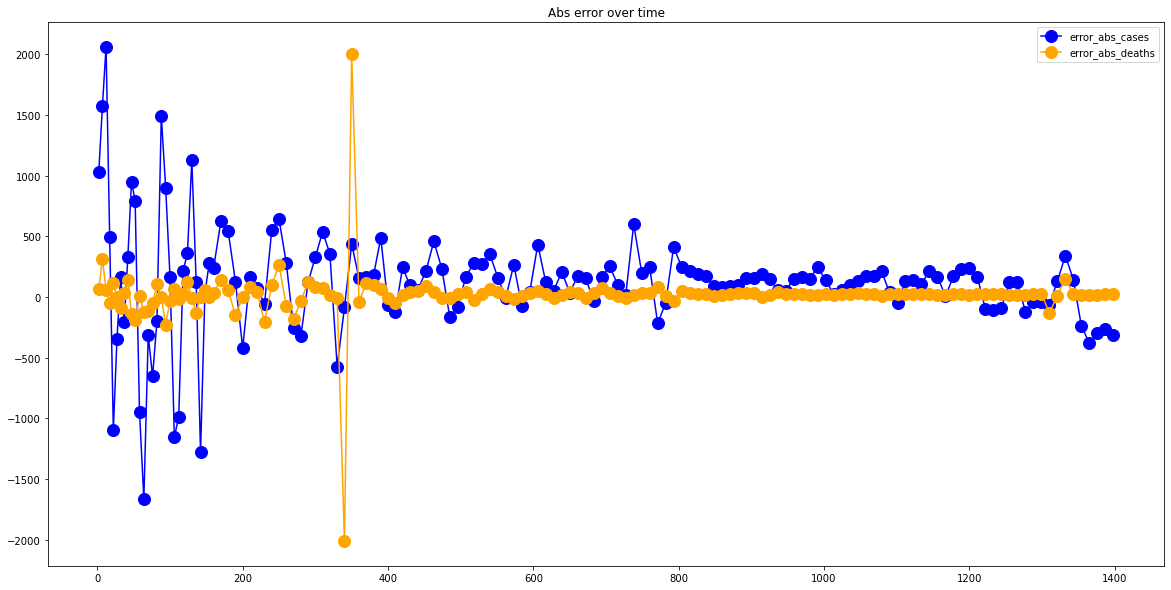

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  1539.0902777777778
RMSE =  2869.2397233897655
-- Spain performances for deaths --
MAE =  131.61805555555554
RMSE =  338.53043314695753


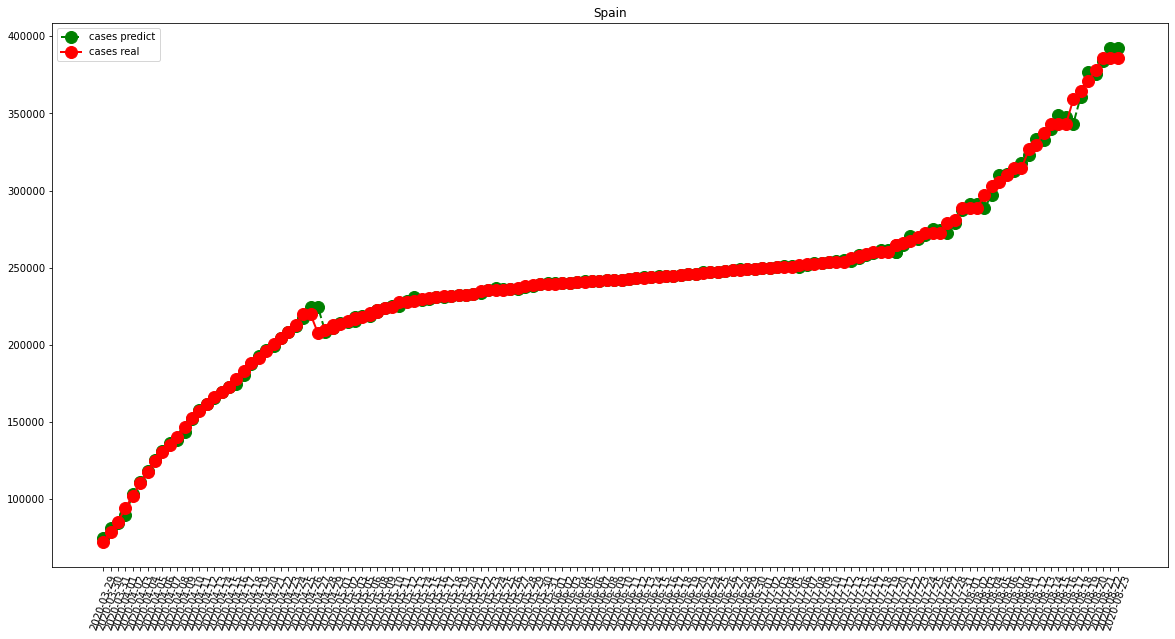

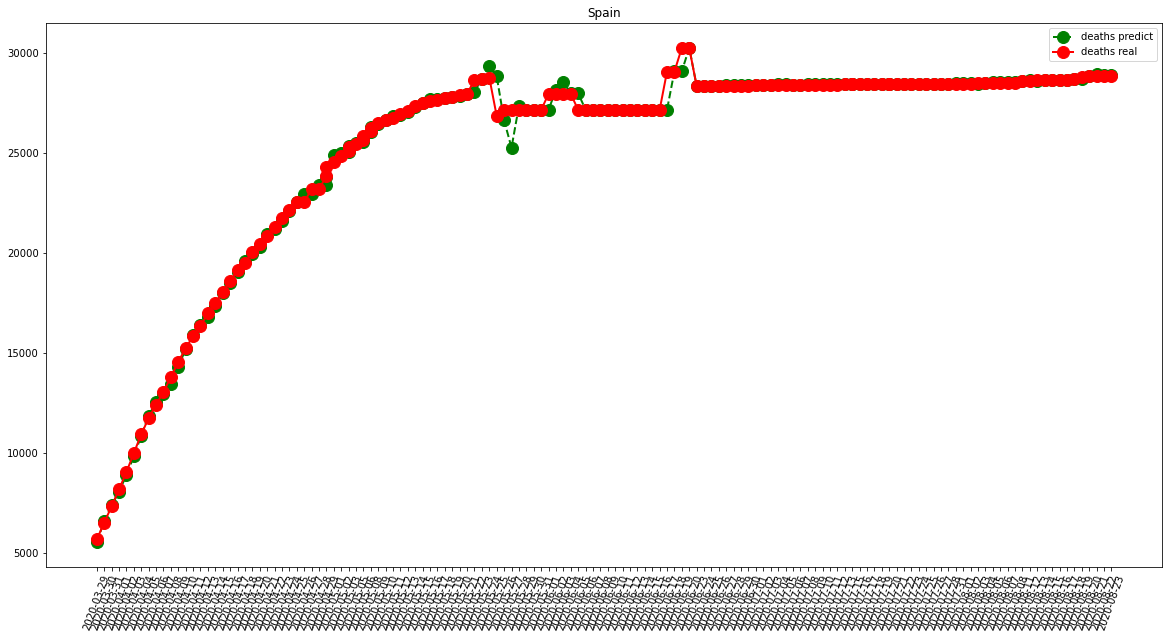

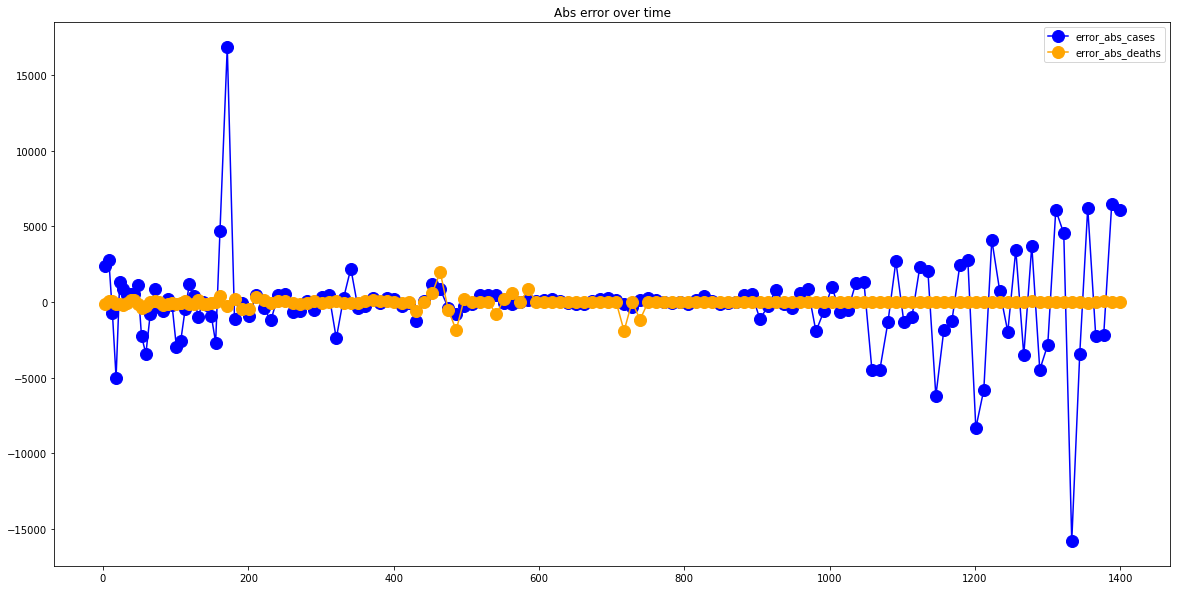

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  10224.097222222223
RMSE =  16098.400166372641
-- United States performances for deaths --
MAE =  492.9791666666667
RMSE =  701.4047066423208


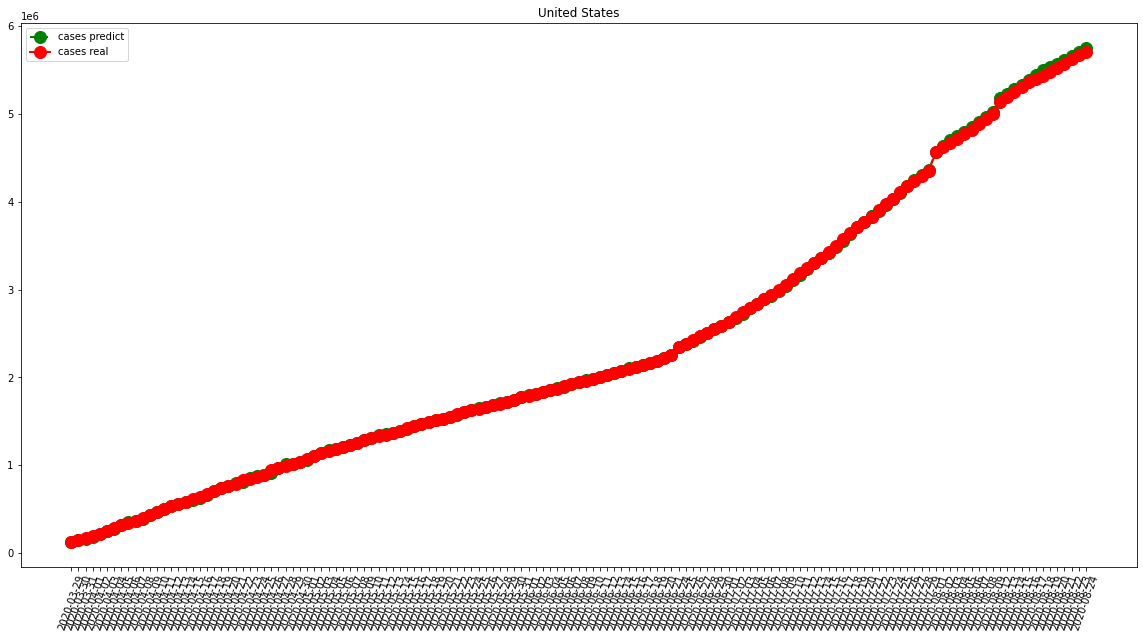

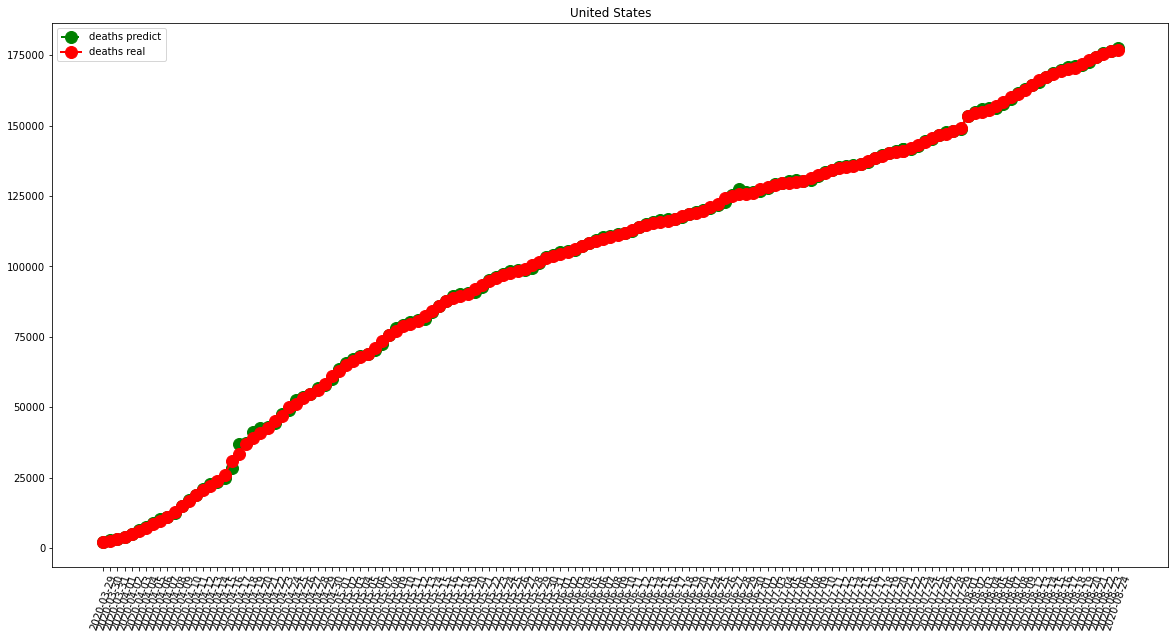

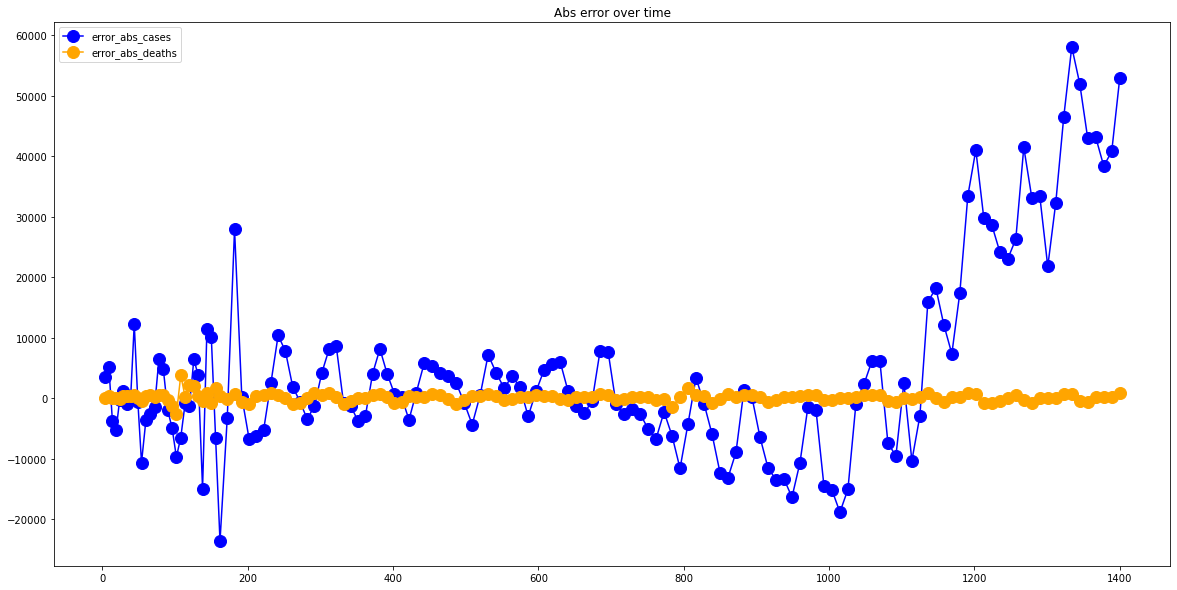

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  69.05555555555556
RMSE =  99.40776014868143
-- China performances for deaths --
MAE =  28.6875
RMSE =  130.84668190927377


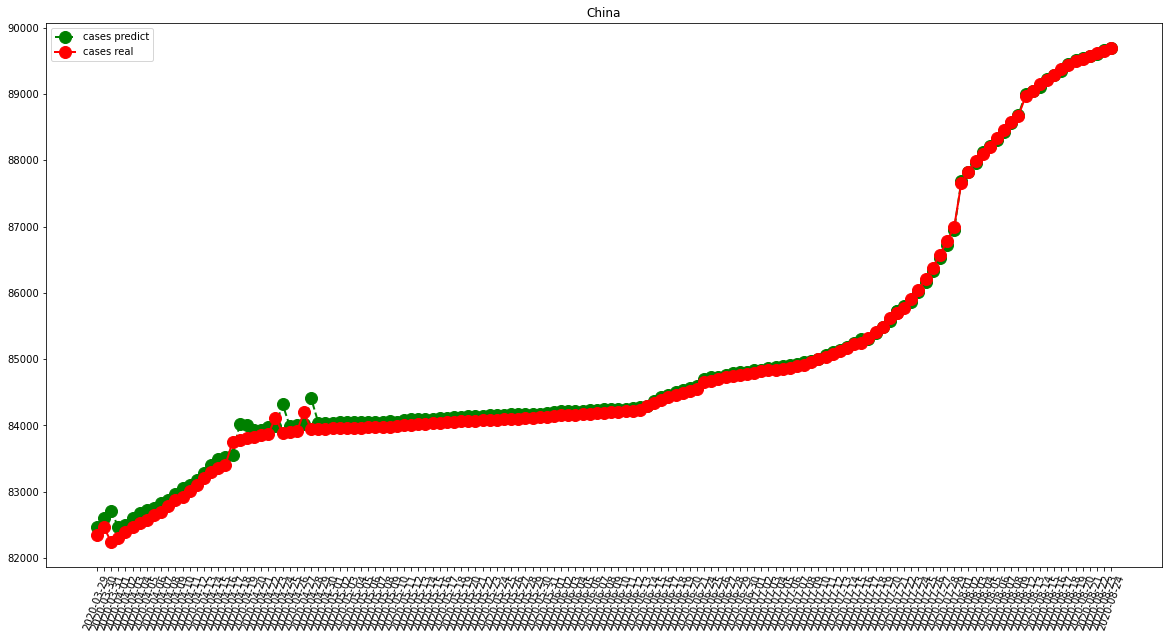

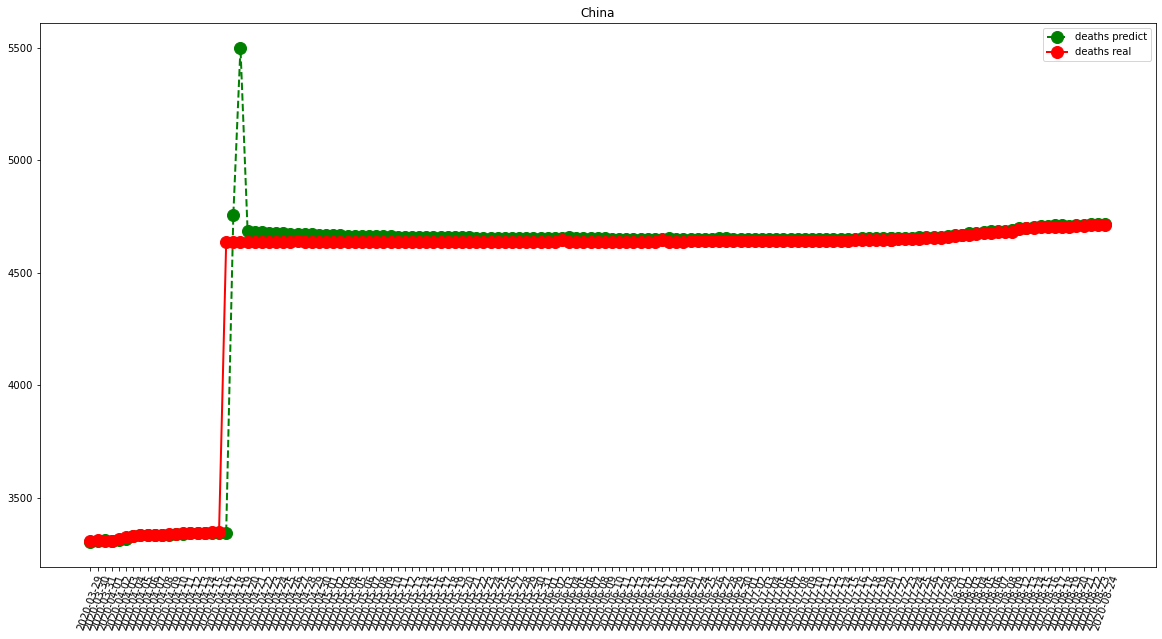

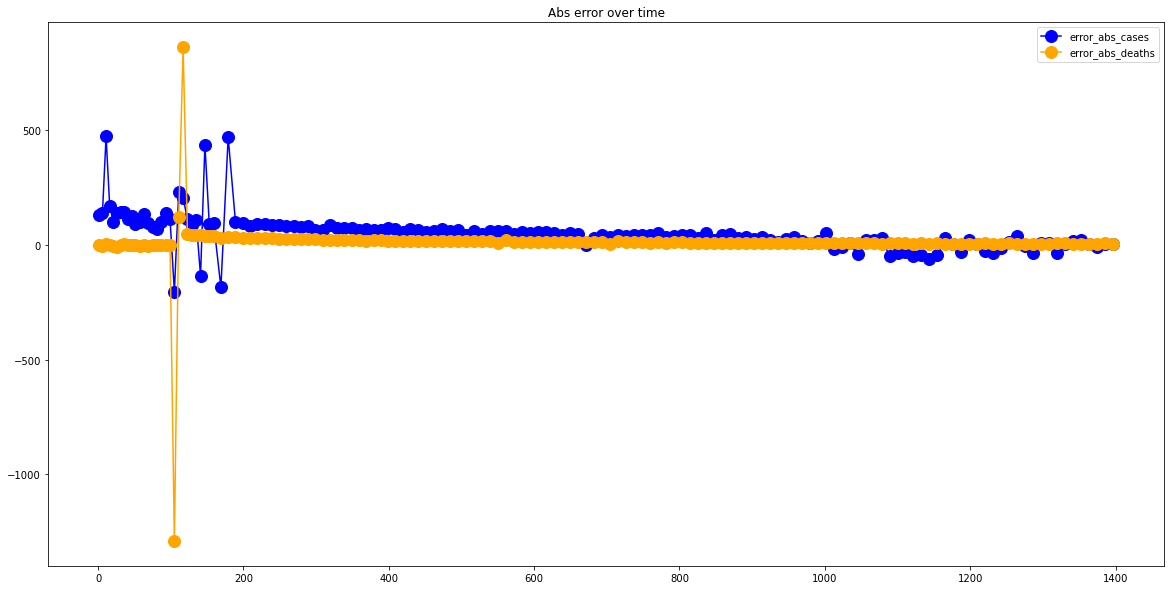

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1117.0862068965516
RMSE =  3881.634123087497
-- United Kingdom performances for deaths --
MAE =  258.1465517241379
RMSE =  792.3111272813181


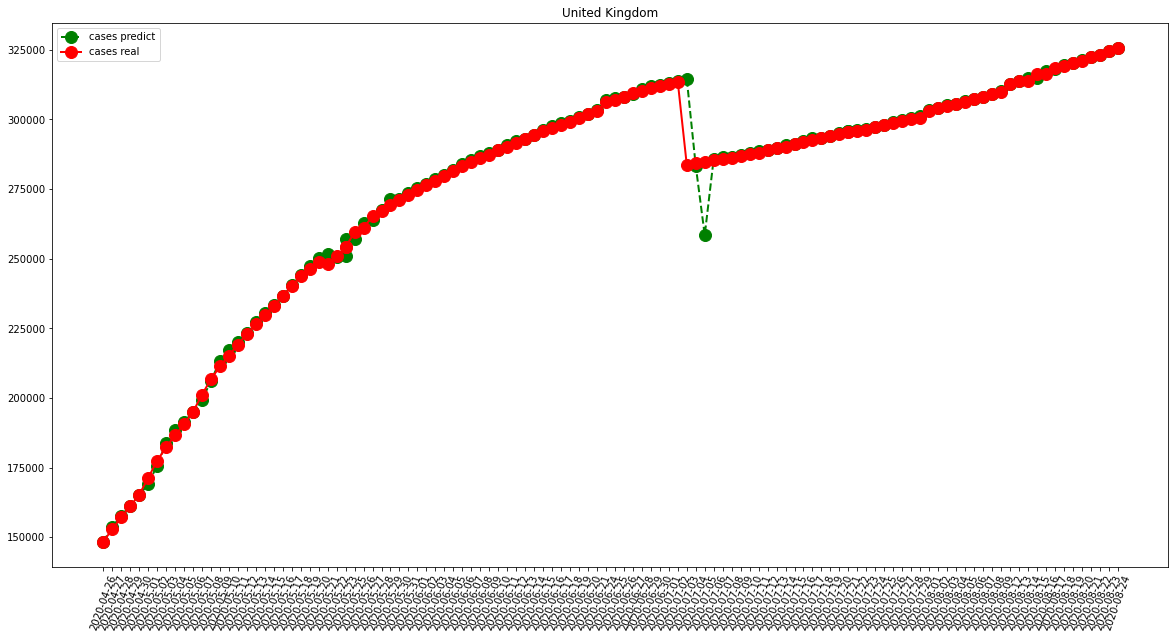

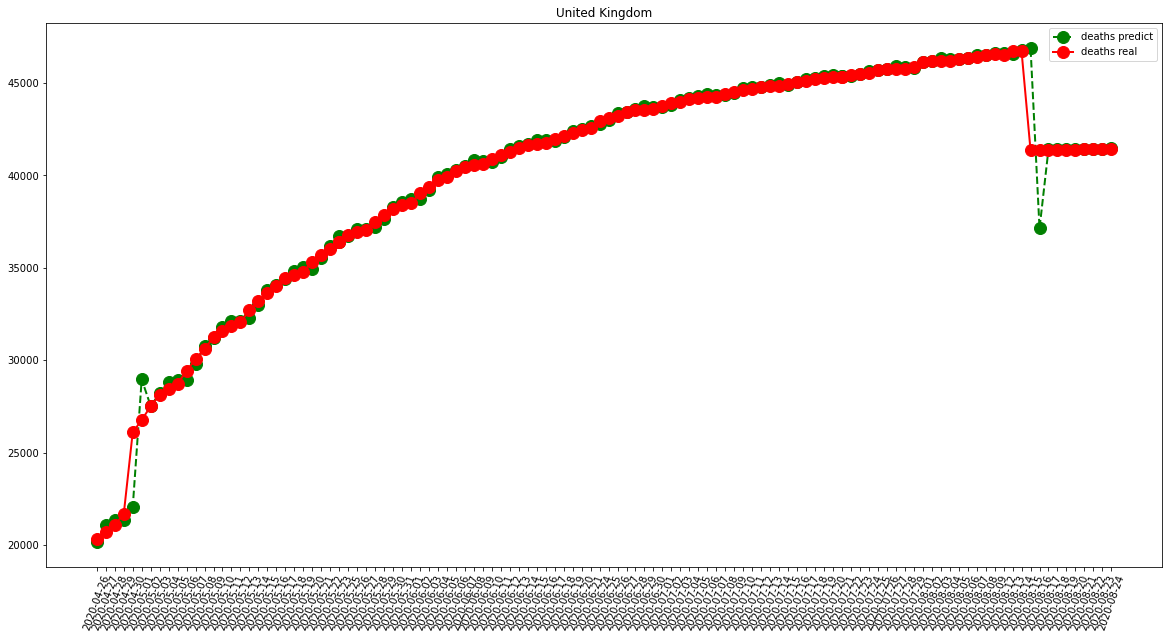

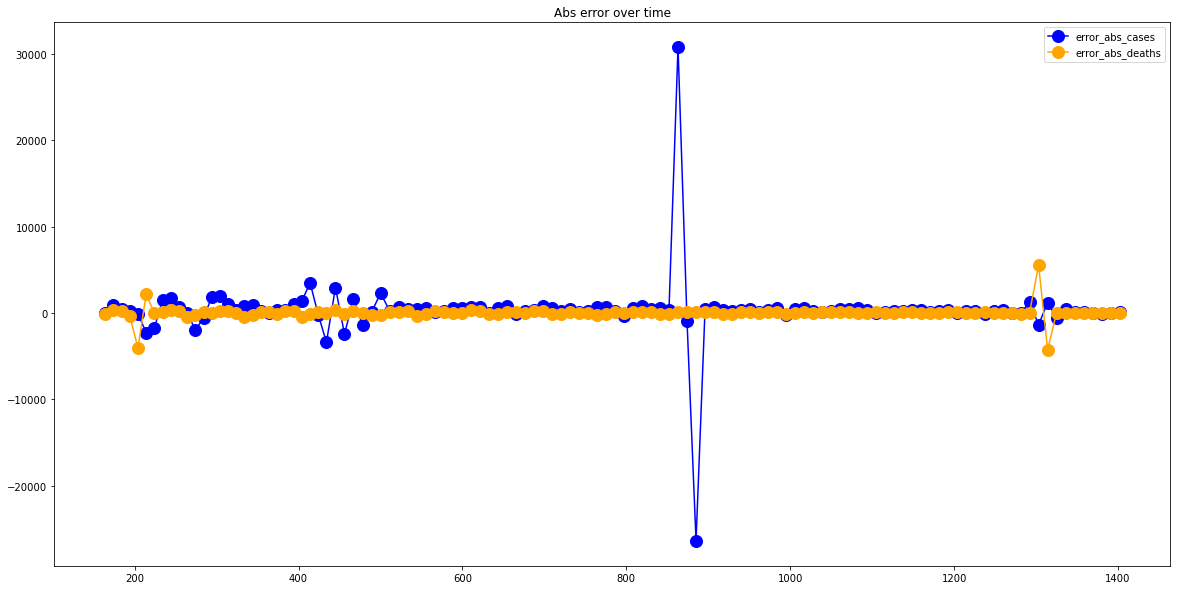

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  394.76724137931035
RMSE =  587.523976033143
-- Germany performances for deaths --
MAE =  22.120689655172413
RMSE =  40.77609171036888


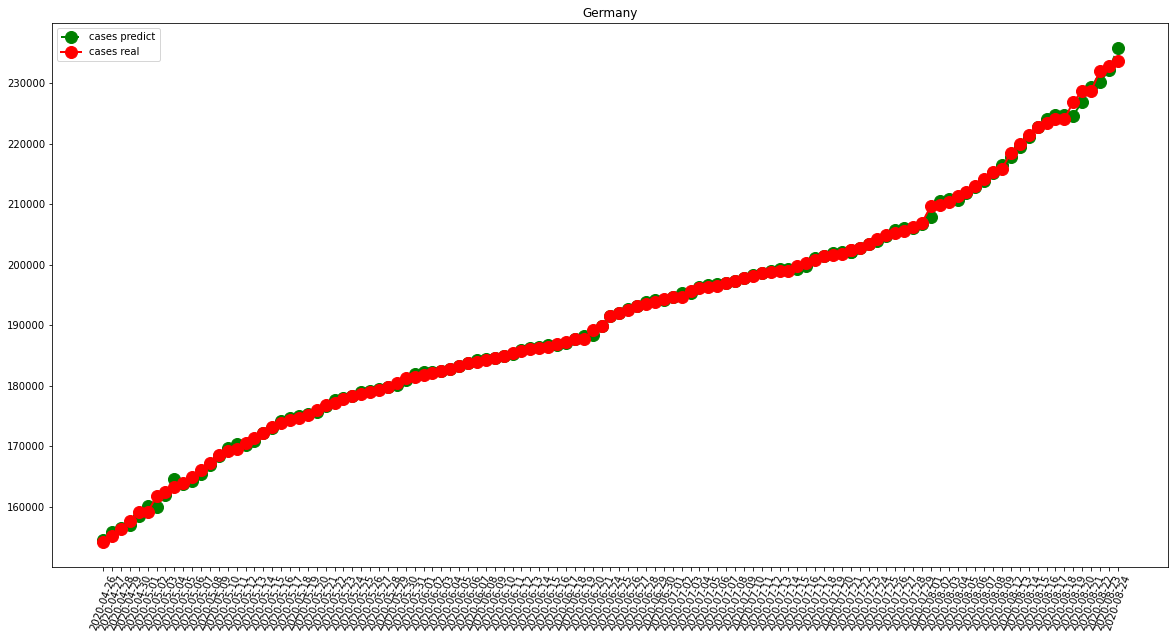

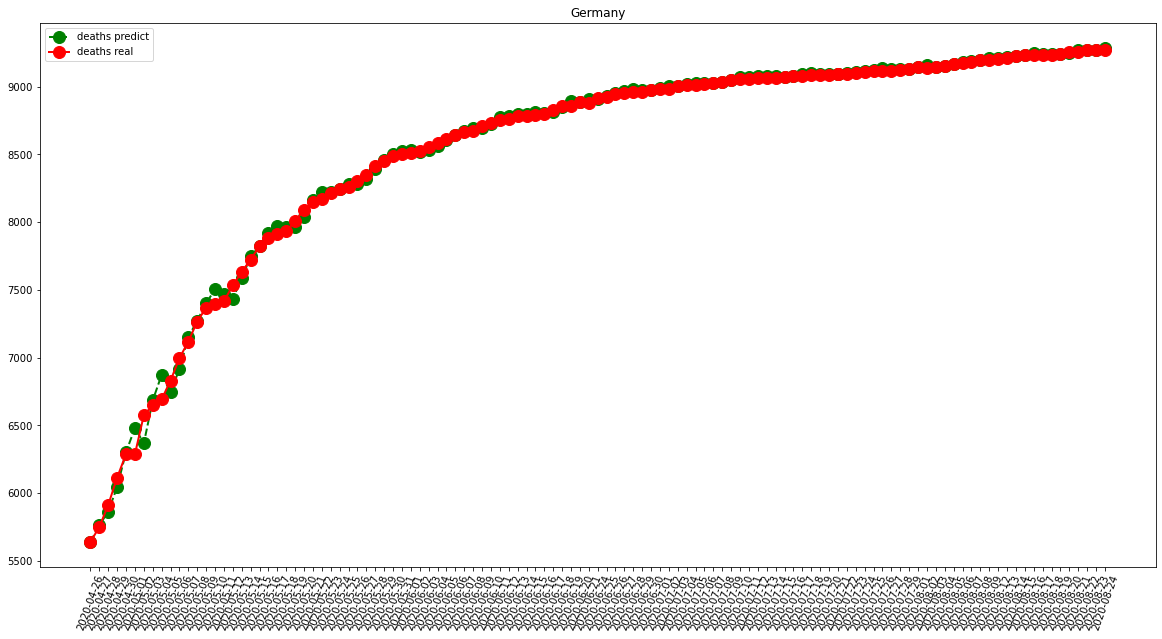

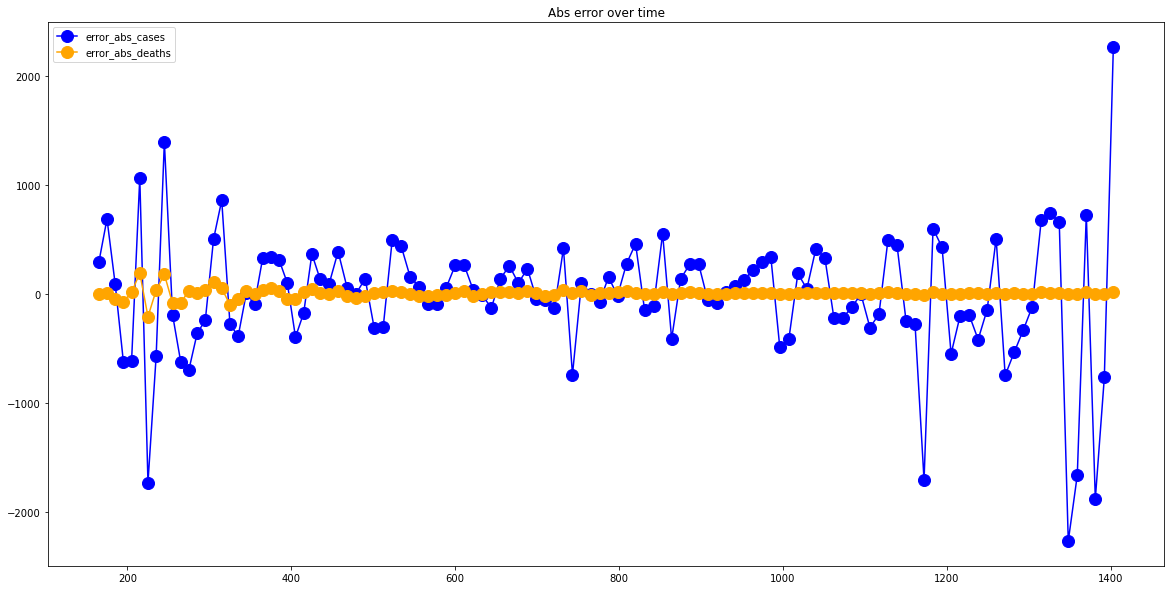

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  699.6810344827586
RMSE =  1026.018883841813
-- Iran performances for deaths --
MAE =  38.189655172413794
RMSE =  74.89153075822622


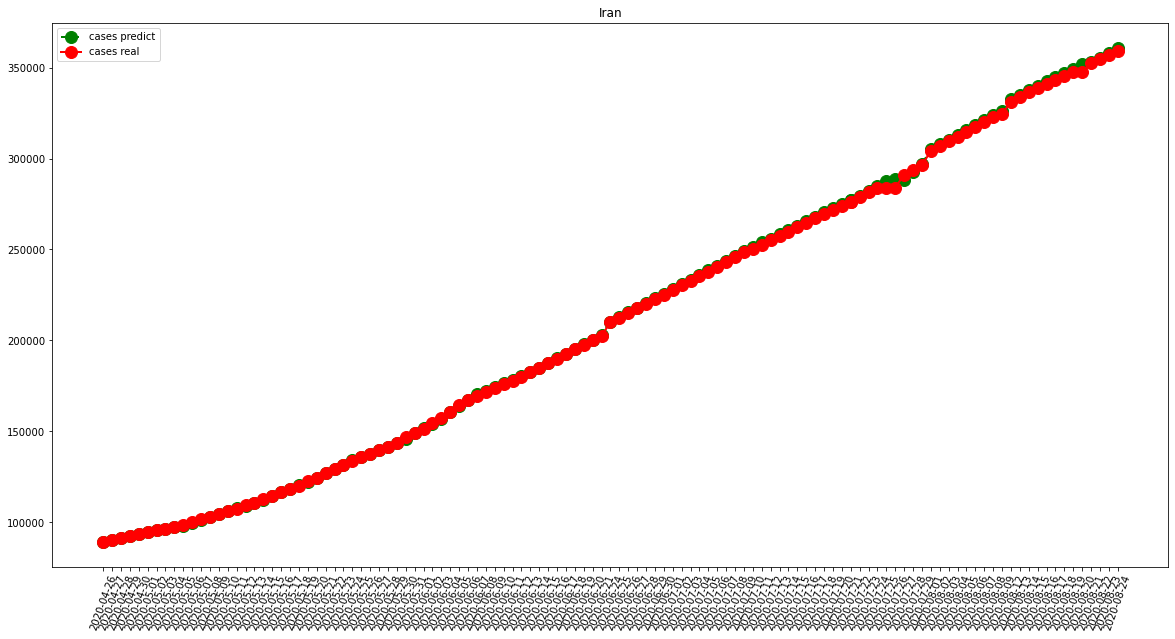

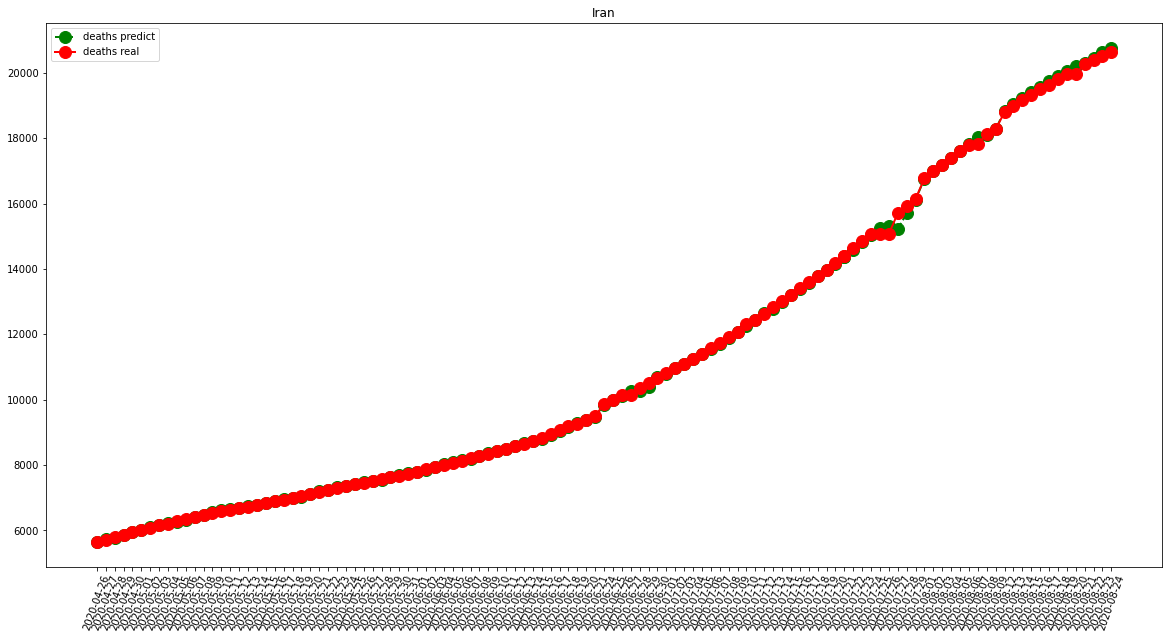

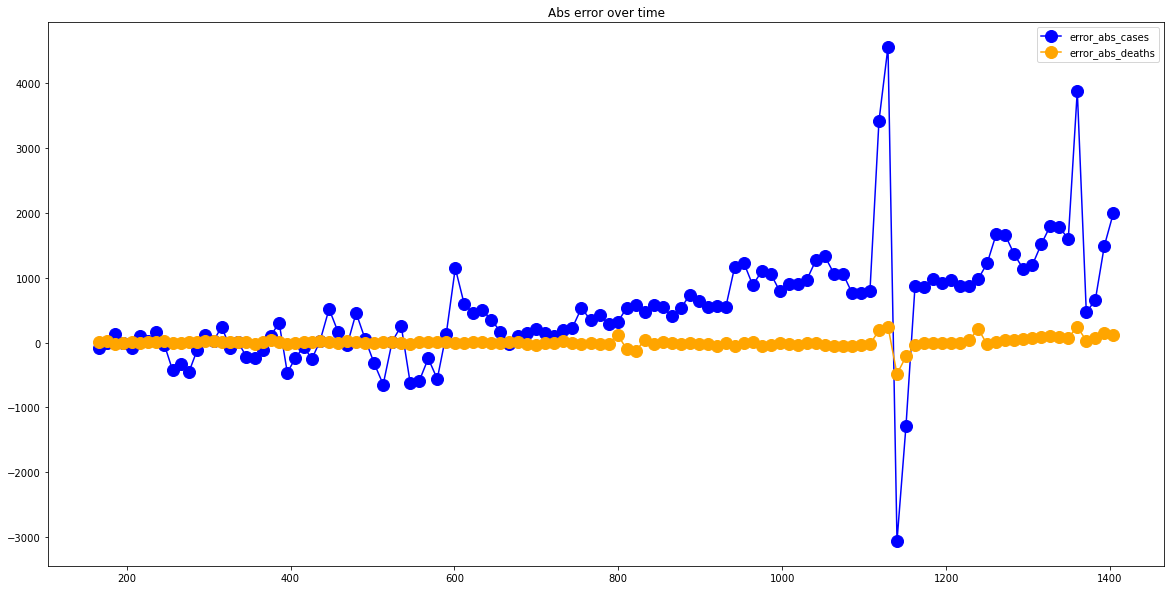

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  195.81896551724137
RMSE =  327.1227097609998
-- Turkey performances for deaths --
MAE =  16.767241379310345
RMSE =  94.25968348681467


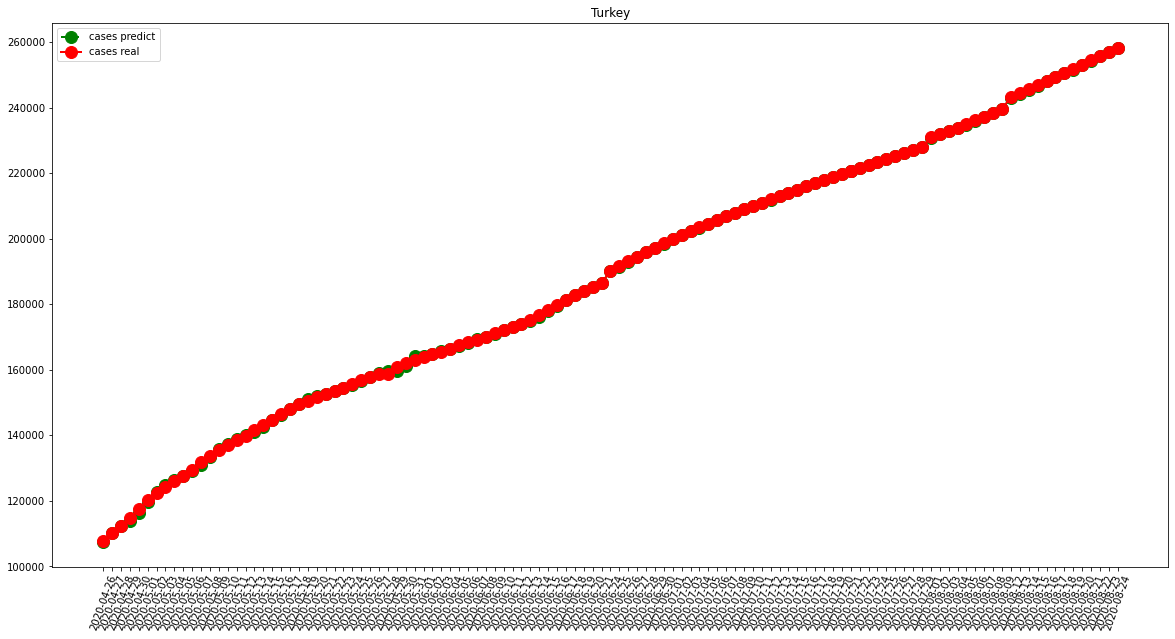

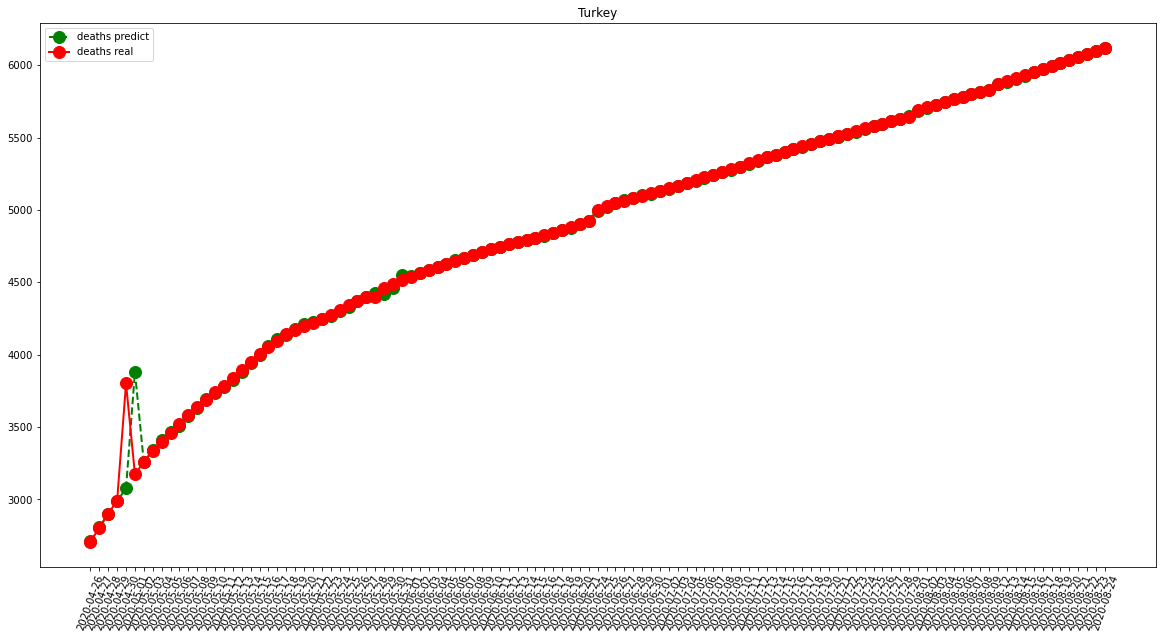

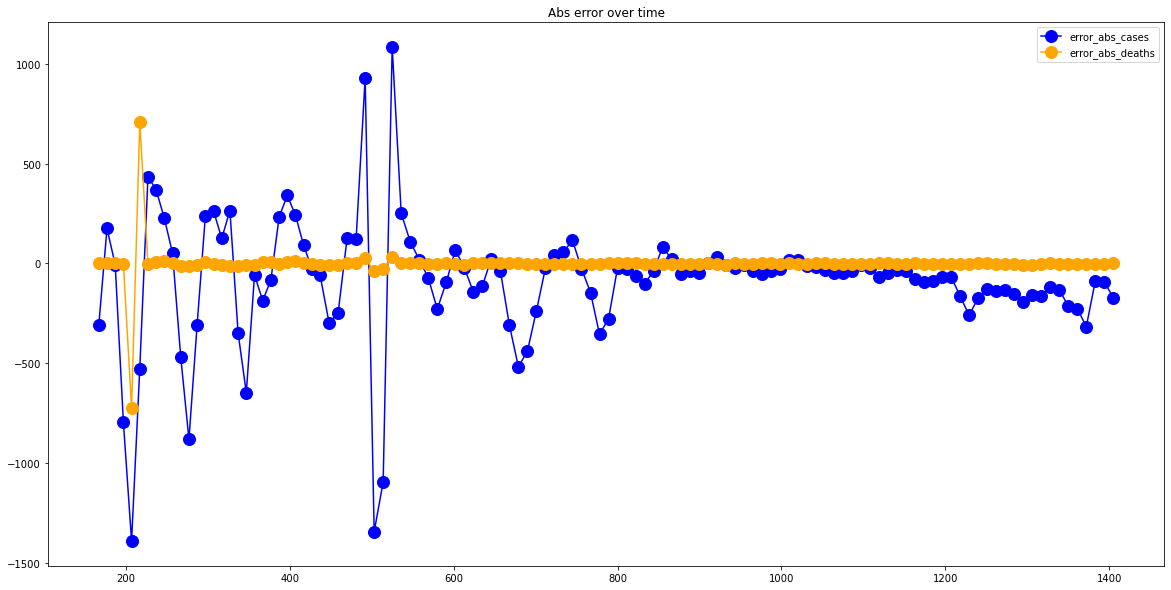

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  13042.14606741573
RMSE =  17397.363235898643
-- Brazil performances for deaths --
MAE =  414.19101123595505
RMSE =  509.3850996792907


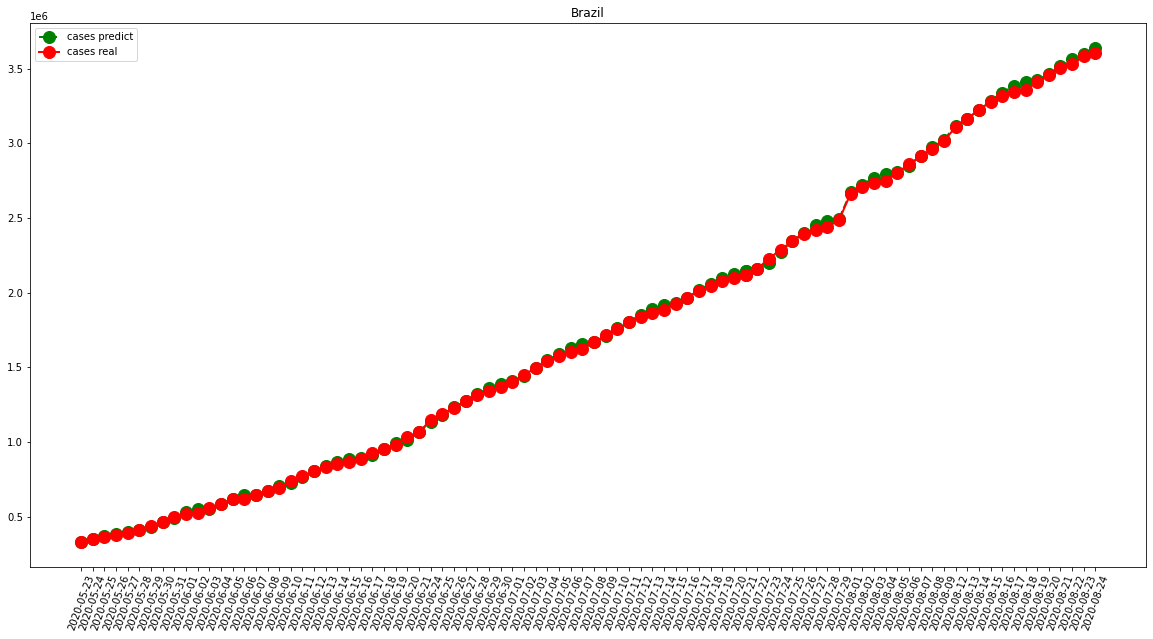

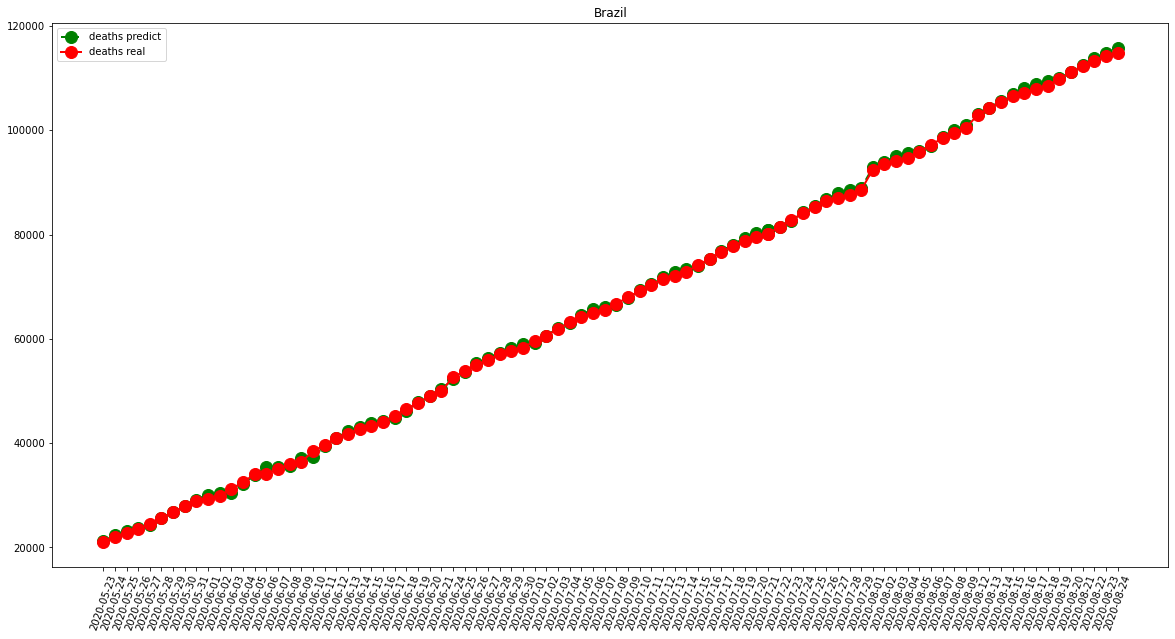

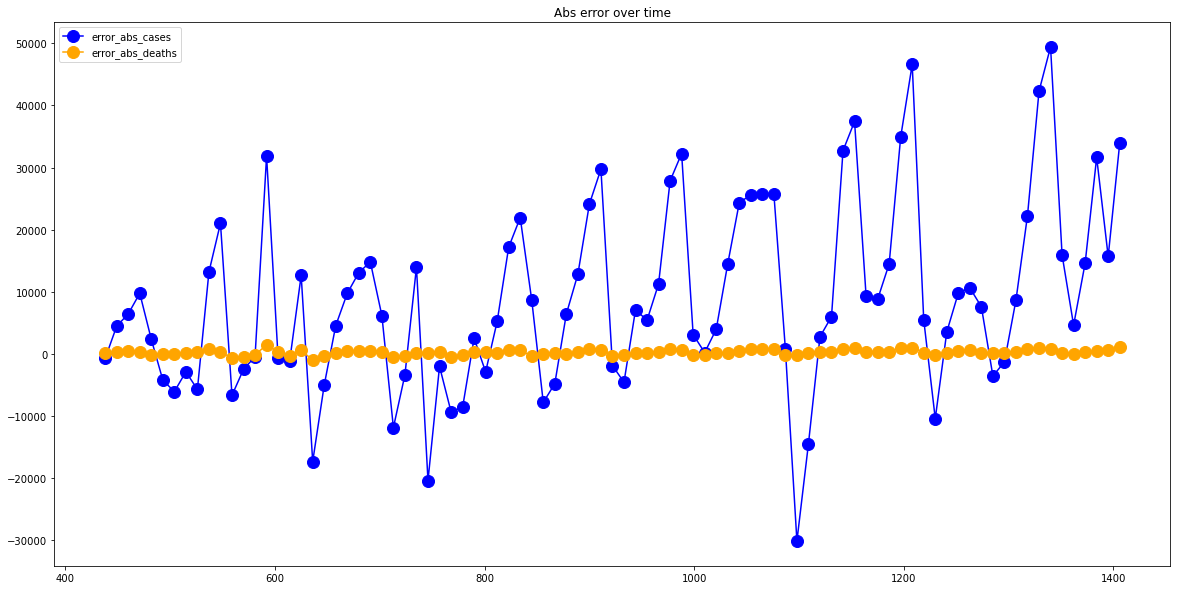

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)